## the 2 chart perceptron

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [4]:
#load data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target

In [5]:
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

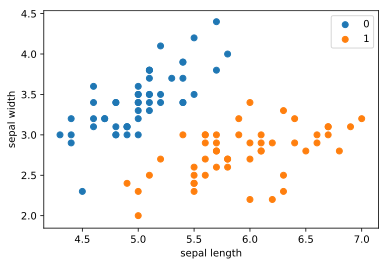

In [6]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [7]:
data = np.array(df.iloc[:100, [0, 1, -1]])

In [8]:
X, y = data[:,:-1], data[:,-1]

In [9]:
y = np.array([1 if i == 1 else -1 for i in y])


In [22]:
class Model:
    def __init__(self):
        self.w=np.ones(len(data[0])-1,dtype=np.float32)
        self.b=0
        self.l_rate=0.1
    def sign(self,x,w,b):
        y=np.dot(x,w)+b
        return y
    #Stochastic gradient descent
    def fit(self,X_train,y_train):
        is_wrong=False
        while not is_wrong:
            wrong_count = 0
            for d in range(len(X_train)):
                X=X_train[d]
                y=y_train[d]
                if y * self.sign(X, self.w, self.b) <= 0:
                    self.w=self.w+self.l_rate*np.dot(y,X)
                    self.b=self.b+self.l_rate*y
                    wrong_count+=1
            if wrong_count==0:
                is_wrong=True
        return 'Perceptron Model'
    
    def score(self):
        # obtain a space before edit this function
        pass
            

In [23]:
perceptron = Model()
perceptron.fit(X, y)

'Perceptron Model'

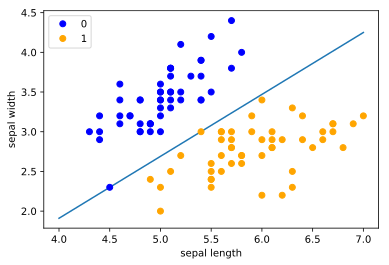

In [24]:
x_points = np.linspace(4, 7,10)
y_ = -(perceptron.w[0]*x_points + perceptron.b)/perceptron.w[1]
plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

## the preceptron from sklearn

In [25]:
from sklearn.linear_model import Perceptron

In [39]:
clf=Perceptron(fit_intercept=False,max_iter=1000,shuffle=False)
clf.fit(X,y)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=False,
      max_iter=1000, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=False, tol=None, verbose=0, warm_start=False)

In [40]:
# Weights assigned to the features.
print(clf.coef_)

[[  74.6 -127.2]]


In [41]:
# Constants in decision function.
print(clf.intercept_)

[0.]


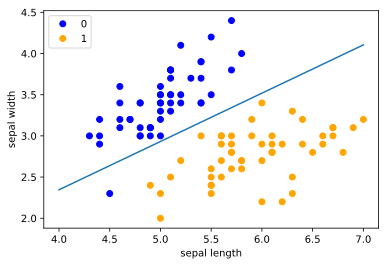

In [42]:
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()